This notebook explores the processed Training data:

- general data exploration
    - shape
    - null values check
    - unique columns count
    - unique disease count
    - data types check
    - observations per disease count

- Average number of symptoms per disease

- Symptom overlap
    - overlap count
    - percent overlap
    - combined
    
- Common Cold pairs selected
    - data
    - plot

## General exploration

In [213]:
import pandas as pd

# Load dataset
disease_df_train = pd.read_csv('../data/processed/Training.csv')

# Display dataset
disease_df_train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [214]:
disease_df_train.shape

(4920, 132)

In [215]:
# Checks for dulplicates in column names
from collections import Counter
items = Counter(list(disease_df_train.columns)).keys()
print("The number of unique column names is:", len(items))

The number of unique column names is: 132


In [216]:
#checks for Nan values in the whole Training data
disease_df_train.isnull().values.any()

False

In [217]:
# Displays full summary for the Training data
disease_df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 132 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    itching                         int64 
 1    skin_rash                       int64 
 2    nodal_skin_eruptions            int64 
 3    continuous_sneezing             int64 
 4    shivering                       int64 
 5    chills                          int64 
 6    joint_pain                      int64 
 7    stomach_pain                    int64 
 8    acidity                         int64 
 9    ulcers_on_tongue                int64 
 10   muscle_wasting                  int64 
 11   vomiting                        int64 
 12   burning_micturition             int64 
 13   spotting_ urination             int64 
 14   fatigue                         int64 
 15   weight_gain                     int64 
 16   anxiety                         int64 
 17   cold_hands_and_feets           

In [218]:
# Counts the number of unique prognosis
disease_df_train['prognosis'].unique().size

41

In [219]:
# Counts the number of observations for each prognosis
disease_df_train.groupby(['prognosis']).size()

prognosis
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hep

## Average number of symptoms

In [220]:
#Finds the average number of symptoms observed for each prognosis

# Creates a list with the number of observed symptoms for each row (each prognosis)
symptom_sum = disease_df_train.iloc[:, :131].sum(axis=1)

# Creates a list of prognosis 
prognosis = disease_df_train['prognosis']

# Combines the two series into a new df
symptom_avg = pd.DataFrame(columns=['symptom_sum', 'prognosis'])
symptom_avg['symptom_sum'] = symptom_sum
symptom_avg['prognosis'] = prognosis

# Find the average number of symptoms for each prognisis
symptom_avg = symptom_avg.groupby(symptom_avg['prognosis'])['symptom_sum'].mean()
print(symptom_avg.sort_values(ascending=False).round(1))

prognosis
Common Cold                                16.6
Tuberculosis                               15.6
Dengue                                     13.6
Hypothyroidism                             12.6
Hepatitis E                                12.6
Hepatitis B                                11.6
Hypoglycemia                               11.6
Hyperthyroidism                            10.6
hepatitis A                                10.6
Pneumonia                                  10.6
Typhoid                                    10.6
Chicken pox                                10.6
Diabetes                                    9.6
Migraine                                    8.6
Hepatitis D                                 8.6
Malaria                                     7.6
Jaundice                                    7.6
Chronic cholestasis                         6.6
Varicose veins                              6.6
Osteoarthristis                             5.7
Psoriasis                     

## Symptom overlap

In [221]:
from itertools import combinations
import numpy as np

In [226]:
# OVERLAP COUNT - Getting pairwise disease overlap counts

# Grouping by disease and suming symptoms for each disease
# = how many times each symptom occurs in patients with that disease.
disease_symptom_matrix = disease_df_train.groupby('prognosis').sum()


# Geting a list of all unique diseases
diseases = disease_symptom_matrix.index.tolist()

# Store pairwise overlap results
overlap_results = {}

# Comparing each pair of diseases
for disease_a, disease_b in combinations(diseases, 2):
    # symptom vectors for the two diseases
    symptom_vector_a = disease_symptom_matrix.loc[disease_a]
    symptom_vector_b = disease_symptom_matrix.loc[disease_b]
    
    # Counting overlapping symptoms (i.e., how many symptoms are "present" in both diseases)
    overlap_count = np.sum((symptom_vector_a > 0) & (symptom_vector_b > 0))
    
    # Store the result
    overlap_results[(disease_a, disease_b)] = overlap_count

# Converts the results to a df
overlap_df = pd.DataFrame.from_dict(overlap_results, orient='index', columns=['overlap_count'])

# Sorted overlap count
overlap_df = overlap_df['overlap_count'].sort_values(ascending=False)
print(overlap_df)

(Hepatitis D, Hepatitis E)                9
(Pneumonia, Tuberculosis)                 9
(Hepatitis D, hepatitis A)                8
(Hepatitis E, hepatitis A)                8
(Common Cold, Tuberculosis)               8
                                         ..
(Chicken pox, Heart attack)               0
(Chicken pox, Osteoarthristis)            0
(Chicken pox, Urinary tract infection)    0
(Chronic cholestasis, Common Cold)        0
(Varicose veins, hepatitis A)             0
Name: overlap_count, Length: 820, dtype: int64


In [227]:
# PERCENT OVERLAP

overlap_results_po = {}

# Compares each pair of diseases
for disease_a, disease_b in combinations(diseases, 2):
    # Get the symptom vectors for the two diseases
    symptom_vector_a = disease_symptom_matrix.loc[disease_a]
    symptom_vector_b = disease_symptom_matrix.loc[disease_b]
    
    # Calculates the intersection (symptoms present in both diseases)
    intersection_count = np.sum((symptom_vector_a > 0) & (symptom_vector_b > 0))
    
    # Calculates the union (symptoms present in at least one disease)
    union_count = np.sum((symptom_vector_a > 0) | (symptom_vector_b > 0))
    
    # Calculates the percent overlap (intersection / union)
    if union_count > 0:
        percent_overlap = (intersection_count / union_count) * 100
    else:
        percent_overlap = 0  # If no symptoms are shared, percent overlap is 0
    
    # Stores the result
    overlap_results_po[(disease_a, disease_b)] = percent_overlap

# Converts the results to a df
overlap_df_po = pd.DataFrame.from_dict(overlap_results_po, orient='index', columns=['percent_overlap'])

# Sorted percent overlap
overlap_df_po['percent_overlap'].sort_values(ascending=False)

(Hepatitis D, Hepatitis E)                69.230769
(Hepatitis D, hepatitis A)                66.666667
(Chronic cholestasis, Hepatitis D)        60.000000
(Chronic cholestasis, hepatitis A)        50.000000
(Hepatitis E, hepatitis A)                50.000000
                                            ...    
(Chicken pox, Heart attack)                0.000000
(Chicken pox, Osteoarthristis)             0.000000
(Chicken pox, Urinary tract infection)     0.000000
(Chronic cholestasis, Common Cold)         0.000000
(Varicose veins, hepatitis A)              0.000000
Name: percent_overlap, Length: 820, dtype: float64

In [ ]:
# Merges overlap count and percent overlap in one df
 
# Resets index to put disease pair into a column 
overlap_df = overlap_df.reset_index()
overlap_df_po = overlap_df_po.reset_index()

# Renames the tuple disease column
overlap_df.rename(columns = {'index': 'disease_pair'}, inplace = True)
overlap_df_po.rename(columns = {'index': 'disease_pair'}, inplace = True)

# Merges the dataframes on 'Disease A' and 'Disease B'
merged_df = pd.merge(overlap_df, overlap_df_po, on=['disease_pair'])

# Checks if all the keys matched
matched_keys = (merged_df.shape[0] == overlap_df.shape[0] == overlap_df_po.shape[0])
if matched_keys:
    print("All keys matched successfully!")
else:
    print("Some keys did not match.")

# Separates tuples into columns
merged_df[['Disease_1', 'Disease_2']] = pd.DataFrame(merged_df['disease_pair'].tolist(), index=merged_df.index)

# Drops the original tuple column
merged_df = merged_df.drop(columns=['disease_pair'])

# Rounds percent values
merged_df.percent_overlap = merged_df.percent_overlap.round(1)

# Sorts
merged_df = merged_df.sort_values('percent_overlap', ascending=False)

# Displays the merged df
merged_df.head(20)

All keys matched successfully!


,overlap_count,percent_overlap,Disease_1,Disease_2
0,9,69.2,Hepatitis D,Hepatitis E
2,8,66.7,Hepatitis D,hepatitis A
10,6,60.0,Chronic cholestasis,Hepatitis D
31,5,50.0,Hepatitis C,Hepatitis D
12,6,50.0,Chronic cholestasis,hepatitis A
1,9,50.0,Pneumonia,Tuberculosis
3,8,50.0,Hepatitis E,hepatitis A
18,6,46.2,Malaria,Typhoid
50,4,44.4,Chronic cholestasis,Hepatitis C
7,6,42.9,Chronic cholestasis,Hepatitis E


## Common Cold pairs

In [263]:
# Selects rows containing "Common Cold" and sorts by percent_overlap
common_cold_pairs = merged_df[merged_df.Disease_1.str.contains("ommon") | merged_df.Disease_2.str.contains("ommon")]
#common_cold_pairs

In [264]:
print(common_cold_pairs["percent_overlap"].quantile(q=0.75))
# Calculate the 0.75 percentile value for Variable1
threshold = common_cold_pairs['percent_overlap'].quantile(0.75)

# Filter the DataFrame to include only rows where Variable1 is at or above the threshold
common_cold_pairs_075 = common_cold_pairs[common_cold_pairs['percent_overlap'] >= threshold]

# Display the filtered DataFrame
common_cold_pairs_075

8.899999999999999


,overlap_count,percent_overlap,Disease_1,Disease_2
6,7,33.3,Common Cold,Pneumonia
4,8,32.0,Common Cold,Tuberculosis
11,6,24.0,Common Cold,Dengue
22,5,21.7,Chicken pox,Common Cold
46,4,19.0,Common Cold,Malaria
45,4,16.7,Common Cold,Typhoid
69,3,15.0,Bronchial Asthma,Common Cold
123,2,10.5,Allergy,Common Cold
121,2,10.0,Common Cold,Hypertension
114,2,9.5,Common Cold,GERD


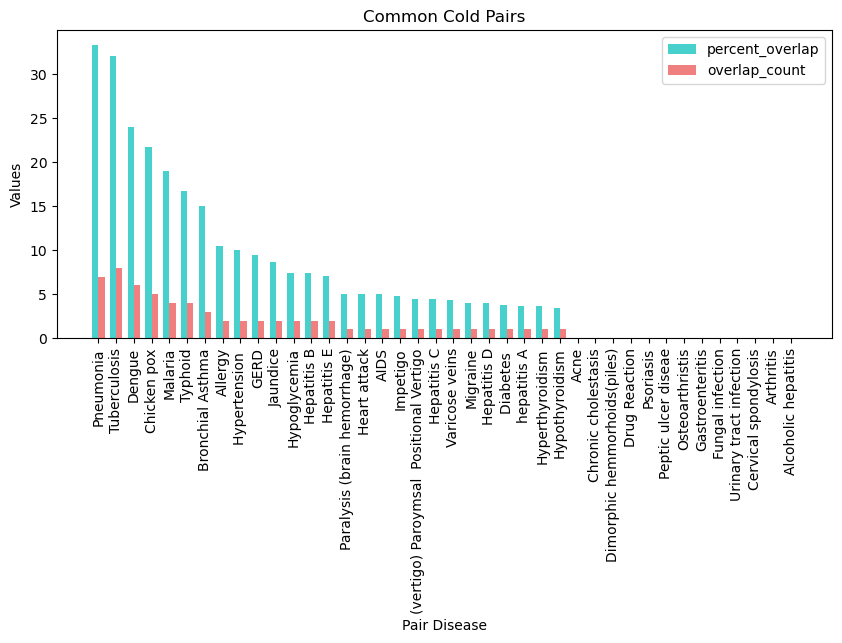

In [277]:
# Plotts the Common Cold pairs
import matplotlib.pyplot as plt

# Define the string to check for in the labels
search_string = 'Common Cold'  # Replace with your actual string

# Function to select x labels based on the search string
def select_label(row):
    if search_string in row['Disease_1']:
        return row['Disease_2']
    else:
        return row['Disease_1']

# Apply the function to create the x-tick labels
x_tick_labels = common_cold_pairs.apply(select_label, axis=1)

# Plotting
x = np.arange(len(common_cold_pairs.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))
bar1 = ax.bar(x - width/2, common_cold_pairs['percent_overlap'], width, label='percent_overlap', color='mediumturquoise')
bar2 = ax.bar(x + width/2, common_cold_pairs['overlap_count'], width, label='overlap_count', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Pair Disease')
ax.set_ylabel('Values')
ax.set_title('Common Cold Pairs')
ax.set_xticks(x)
ax.set_xticklabels(x_tick_labels, rotation=90, ha='center')
ax.legend()